In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('C:/Users/kaitnam/Desktop/머신러닝_이경미/titanic_train.csv')
titanic_df.head(3)
                        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# PassengerId : 탑승자 데이터 일련번호
# survived: 생존 여부, 0 = 사망, 1 = 생존
# Pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
# sex : 탑승자 성별
# name : 탑승자 이름
# Age :  탑승자 나이
# sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
# parch : 같이 탑승한 부모님 또는 어린이 인원수
# ticket : 티켓 번호
# fare : 요금
# cabin : 선실 번호
# embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# 데이터 컬럼 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 결측치 개수 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Null 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean, inplace = True)
titanic_df['Cabin'].fillna("N", inplace = True)
titanic_df['Embarked'].fillna("N", inplace = True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 확인
print('Sex 분포: \n', titanic_df['Sex'].value_counts())
print('Cabin 분포: \n', titanic_df['Cabin'].value_counts())
print('Embarked 분포: \n', titanic_df['Embarked'].value_counts())

Sex 분포: 
 male      577
female    314
Name: Sex, dtype: int64
Cabin 분포: 
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
              ... 
D47              1
D6               1
A5               1
E68              1
A10              1
Name: Cabin, Length: 148, dtype: int64
Embarked 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [9]:
# Cabin 값을 선실등급만으로 표기(선실 번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [12]:
# 성별(Sex) 분포 확인
print(titanic_df.groupby('Sex')['Sex'].count())

# 생존(Survived) 분포 확인
print(titanic_df.groupby('Survived')['Survived'].count())

# 사망 : 0
# 생존 : 1

Sex
female    314
male      577
Name: Sex, dtype: int64
Survived
0    549
1    342
Name: Survived, dtype: int64


In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
# 여자 : 314명 중 233명 생존 (약 74.2% 생존)
# 남자 : 577명 중 109명 생존 (약 18.8% 생존)

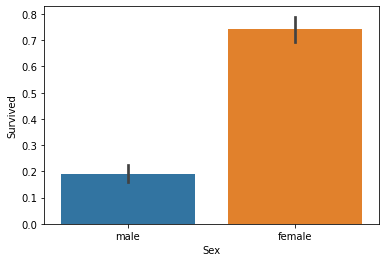

In [14]:
# 성별 생존자 : 막대 그래프 (barplot)
sns.barplot(x='Sex', y = 'Survived', data = titanic_df)

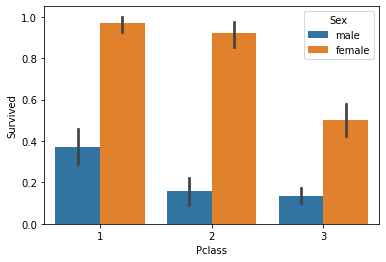

In [16]:
# 객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)